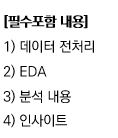

# Module

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

# Data Load

In [3]:
df = pd.read_excel('data/our_home.xlsx')
print(df.shape)
df.head(10)

(40000, 10)


,날짜,메뉴,포스번호,영수번호,시간,수량,매출,메뉴번호,요일,날씨
0,20221125,[40863]캬라멜팝콘(M),2,73,1956,1,5000,40863,금,비
1,20221030,[40860]컵와인 까베르네소비뇽,1,293,1912,2,18182,40860,일,맑음
2,20221109,[00413]아이스 아메리카노(Ice Coffee),1,43,1931,1,4545,413,수,흐림
3,20221019,[40863]캬라멜팝콘(M),1,20,1925,1,5000,40863,수,맑음
4,20221112,[15867]츄러스,1,109,1328,1,4545,15867,토,비
5,20221230,[00413]아이스 아메리카노(Ice Coffee),3,23,1413,1,4545,413,금,맑음
6,20221105,[40858]컵와인 샤도네이,1,464,2036,1,9091,40858,토,맑음
7,20221126,[15867]츄러스,3,97,1326,2,9091,15867,토,맑음
8,20221224,[14097]생수,1,359,1927,1,909,14097,토,맑음
9,20221029,[32291]코카콜라,5,148,1902,1,3182,32291,토,맑음


# Data Info

In [4]:
print('중복값 : {}'.format(df.duplicated().sum()))

중복값 : 0


In [5]:
df.isnull().sum()

날짜      0
메뉴      0
포스번호    0
영수번호    0
시간      0
수량      0
매출      0
메뉴번호    0
요일      0
날씨      0
dtype: int64

In [6]:
def summary(df):
    dfs = pd.DataFrame(data = df.dtypes, columns = ['data_type'])
    dfs['missing'] = df.isnull().sum()
    dfs['nunique'] = df.nunique()
    dfs.sort_values(by = ['data_type', 'nunique'], inplace = True)
    return dfs

summary(df)

,data_type,missing,nunique
포스번호,int64,0,5
수량,int64,0,19
메뉴번호,int64,0,37
날짜,int64,0,58
매출,int64,0,72
시간,int64,0,529
영수번호,int64,0,597
날씨,object,0,4
요일,object,0,6
메뉴,object,0,37


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
날짜,40000.0,2.022141e+07,1493.755144,20221019.0,20221111.0,20221203.0,20221222.0,20230101.0
포스번호,40000.0,2.774200e+00,1.446813,1.0,1.0,3.0,4.0,5.0
영수번호,40000.0,1.323658e+02,107.104122,1.0,48.0,102.0,198.0,650.0
시간,40000.0,1.734953e+03,249.958838,1029.0,1531.0,1842.0,1923.0,2125.0
수량,40000.0,1.220375e+00,0.816686,1.0,1.0,1.0,1.0,96.0
매출,40000.0,5.994103e+03,5072.879928,909.0,3636.0,4545.0,7273.0,305455.0
메뉴번호,40000.0,2.533182e+04,14425.716834,410.0,14097.0,32291.0,40863.0,40879.0


In [8]:
def numeric(df):
    return df.select_dtypes(include = np.number).columns

def categoric(df):
    return df.select_dtypes(exclude = np.number).columns

# 이상치 확인

In [9]:
cond = df['수량'] == 96
df[cond]

,날짜,메뉴,포스번호,영수번호,시간,수량,매출,메뉴번호,요일,날씨
182,20221112,[32291]코카콜라,3,1,1029,96,305455,32291,토,비


In [10]:
cond = df[df['수량'] == 96].index
df.drop(cond, inplace = True)

# Data Pre

In [11]:
df1 = df.copy()
df1.head(2)

,날짜,메뉴,포스번호,영수번호,시간,수량,매출,메뉴번호,요일,날씨
0,20221125,[40863]캬라멜팝콘(M),2,73,1956,1,5000,40863,금,비
1,20221030,[40860]컵와인 까베르네소비뇽,1,293,1912,2,18182,40860,일,맑음


In [12]:
df1['날짜'] = df1['날짜'].astype(str)
df1['년'] = df1['날짜'].str[:4].astype(int)
df1['월'] = df1['날짜'].str[4:6].astype(int)
df1['일'] = df1['날짜'].str[6:8].astype(int)

df1.drop(['날짜'], axis = 1, inplace = True)
df1.head(2)

,메뉴,포스번호,영수번호,시간,수량,매출,메뉴번호,요일,날씨,년,월,일
0,[40863]캬라멜팝콘(M),2,73,1956,1,5000,40863,금,비,2022,11,25
1,[40860]컵와인 까베르네소비뇽,1,293,1912,2,18182,40860,일,맑음,2022,10,30


In [13]:
df1.drop(['메뉴번호'], axis = 1, inplace = True)
df1['메뉴'] = df1['메뉴'].str.replace(r'\[\d+\]', '', regex=True)
df1.head(2)

,메뉴,포스번호,영수번호,시간,수량,매출,요일,날씨,년,월,일
0,캬라멜팝콘(M),2,73,1956,1,5000,금,비,2022,11,25
1,컵와인 까베르네소비뇽,1,293,1912,2,18182,일,맑음,2022,10,30


In [14]:
df1['메뉴'].unique() #37

array(['캬라멜팝콘(M)', '컵와인 까베르네소비뇽', '아이스 아메리카노(Ice Coffee)', '츄러스',
       '컵와인 샤도네이', '생수', '코카콜라 ', '캬라멜 팝콘(L)', 'Couple set A', '뉴욕핫도그',
       '컵와인 핑크모스카토', '아이스티(복숭아)', '클라우드(캔)', '토레타', '스프라이트 ',
       '아메리카노(Americano)', '미닛메이드 포도', '순살닭강정', '핫초코', '오리지널 팝콘(M)',
       'Single set ', '프레즐', '(배민)양념 소떡소떡(1p)', 'Beer set', 'Family set',
       '허브티', '사케', '카페라떼', '미닛메이드 오렌지', '하겐다즈 바닐라', '하겐다즈 쵸코',
       '오리지널 팝콘(L)', '하겐다즈 딸기', '쵸코라떼 (HOT)', '뱅쇼(G)', 'Couple set B',
       '샤퀴테리 Box (4구)'], dtype=object)

In [15]:
def classify(product_name):
    drinks = ['컵와인 까베르네소비뇽', '컵와인 샤도네이', '컵와인 핑크모스카토', '클라우드(캔)', '뱅쇼(G)', '사케']
    coffees = ['아이스 아메리카노(Ice Coffee)', '아메리카노(Americano)', '카페라떼', '쵸코라떼 (HOT)']
    juices = ['생수', '코카콜라 ', '아이스티(복숭아)', '미닛메이드 오렌지', '미닛메이드 포도', '토레타', '허브티', '핫초코', '스프라이트 ']
    snacks = ['캬라멜팝콘(M)', '캬라멜 팝콘(L)', '오리지널 팝콘(L)', '오리지널 팝콘(M)', '츄러스', '뉴욕핫도그', '프레즐', '(배민)양념 소떡소떡(1p)', '샤퀴테리 Box (4구)', '순살닭강정']
    ice_creams = ['하겐다즈 바닐라', '하겐다즈 쵸코', '하겐다즈 딸기']
    set_menu = ['Single set ', 'Couple set A', 'Couple set B', 'Beer set', 'Family set']
    
    if product_name in drinks:
        return '알콜'
    elif product_name in coffees:
        return '커피'
    elif product_name in juices:
        return '주스'
    elif product_name in snacks:
        return '스낵'
    elif product_name in ice_creams:
        return '아이스크림'
    elif product_name in set_menu:
        return '세트메뉴'

In [16]:
df1['분류'] = '기타'
df1['분류'] = df1['메뉴'].apply(classify)
df1.head(2)

,메뉴,포스번호,영수번호,시간,수량,매출,요일,날씨,년,월,일,분류
0,캬라멜팝콘(M),2,73,1956,1,5000,금,비,2022,11,25,스낵
1,컵와인 까베르네소비뇽,1,293,1912,2,18182,일,맑음,2022,10,30,알콜


In [17]:
df1['시간'] = df1['시간'].astype(str)
df1['시'] = df1['시간'].str[:2].astype(int)
df1['분'] = df1['시간'].str[2:].astype(int)

cond = (df1['시'] > 12)
df1.loc[cond, '시'] = (df1['시'] - 12).astype(str) + 'PM'
df1.loc[~cond, '시'] = df1['시'].astype(str) + 'AM'

df1.drop(['시간', '분'], axis = 1, inplace = True)
df1.rename(columns = {'시' : '시간'}, inplace = True)
df1.head(2)

,메뉴,포스번호,영수번호,수량,매출,요일,날씨,년,월,일,분류,시간
0,캬라멜팝콘(M),2,73,1,5000,금,비,2022,11,25,스낵,7PM
1,컵와인 까베르네소비뇽,1,293,2,18182,일,맑음,2022,10,30,알콜,7PM


In [18]:
df1['총 매출'] = round(df1['수량'] * (df1['매출'] * 1.1), 0).astype(int)
df1.head(2)

,메뉴,포스번호,영수번호,수량,매출,요일,날씨,년,월,일,분류,시간,총 매출
0,캬라멜팝콘(M),2,73,1,5000,금,비,2022,11,25,스낵,7PM,5500
1,컵와인 까베르네소비뇽,1,293,2,18182,일,맑음,2022,10,30,알콜,7PM,40000


In [19]:
df1['주'] = '평일'

cond1 = (df1['요일'] == '토')
cond2 = (df1['요일'] == '일')

df1.loc[cond1 | cond2, '주'] = '주말'
df1.head(2)

,메뉴,포스번호,영수번호,수량,매출,요일,날씨,년,월,일,분류,시간,총 매출,주
0,캬라멜팝콘(M),2,73,1,5000,금,비,2022,11,25,스낵,7PM,5500,평일
1,컵와인 까베르네소비뇽,1,293,2,18182,일,맑음,2022,10,30,알콜,7PM,40000,주말


# EDA

In [22]:
df2 = df1.copy()
df2.head()

,메뉴,포스번호,영수번호,수량,매출,요일,날씨,년,월,일,분류,시간,총 매출,주
0,캬라멜팝콘(M),2,73,1,5000,금,비,2022,11,25,스낵,7PM,5500,평일
1,컵와인 까베르네소비뇽,1,293,2,18182,일,맑음,2022,10,30,알콜,7PM,40000,주말
2,아이스 아메리카노(Ice Coffee),1,43,1,4545,수,흐림,2022,11,9,커피,7PM,5000,평일
3,캬라멜팝콘(M),1,20,1,5000,수,맑음,2022,10,19,스낵,7PM,5500,평일
4,츄러스,1,109,1,4545,토,비,2022,11,12,스낵,1PM,5000,주말


## 탐색적 분석

1. Pie Chart로 메뉴와 매출액 비교

In [90]:
def eda_menu(x, y):
    df2_menu = df2.groupby(x)[y].sum().sort_values(ascending = True)
    df2_menu['Others'] = df2_menu[df2_menu / df2_menu.sum() < 0.03].sum()
    df2_menu_filltered = df2_menu[df2_menu / df2_menu.sum() >= 0.03]

    plt.figure(figsize=(6, 6))
    plt.pie(df2_menu_filltered, labels=df2_menu_filltered.index, 
            autopct='%.1f%%', 
            startangle=90,
            colors=plt.cm.Set3.colors, 
            wedgeprops=dict(edgecolor='w', linewidth=2))

    plt.title('{}별 판매 {} 비율 (3% 이상)'.format(x, y))
    plt.tight_layout()
    plt.show()

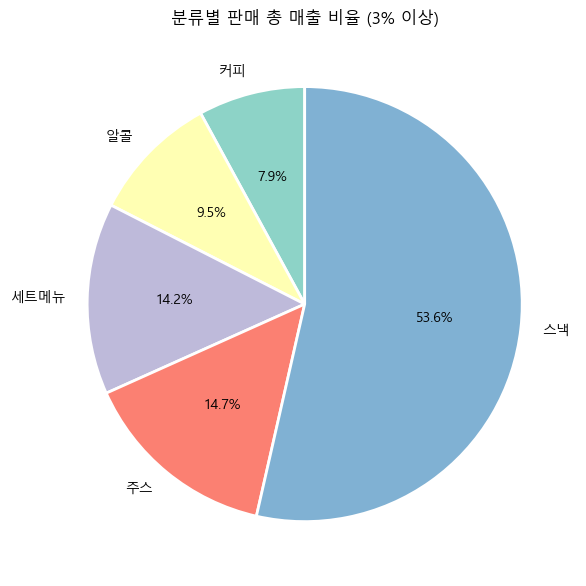

In [91]:
eda_menu('분류', '총 매출')

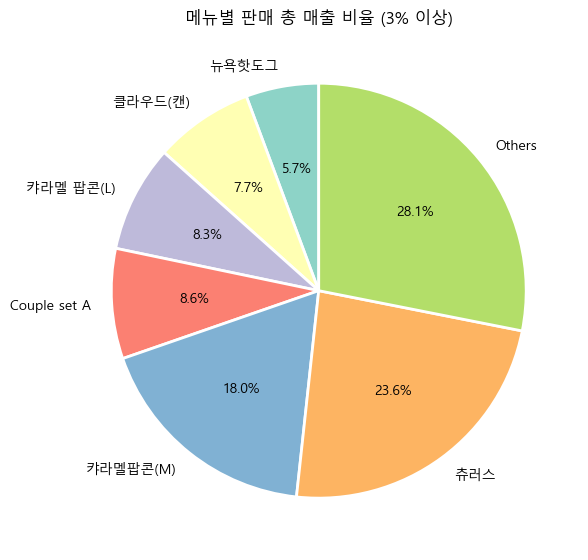

In [92]:
eda_menu('메뉴', '총 매출')

파이차트 확인결과 전체 매출의 50%이상이 스낵, 그 중에서 츄러스와 팝콘제품의 비율이 높다.

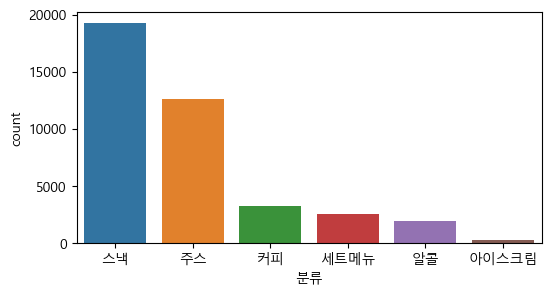

In [93]:
plt.figure(figsize = (6, 3))
sns.countplot(data = df2, x = '분류', order = df2['분류'].value_counts().index)
plt.show()

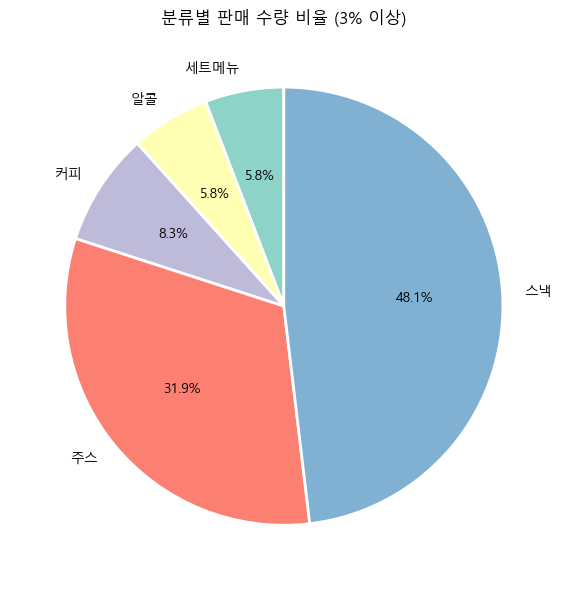

In [94]:
eda_menu('분류', '수량')

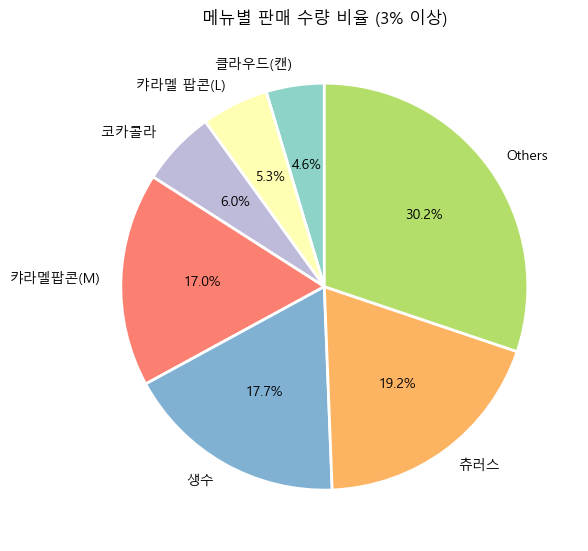

In [95]:
eda_menu('메뉴', '수량')

1. 스낵의 판매수량이 많기 때문에 판매매출이 높은것으로 나타난다.  
2. 생수, 코카콜라등 주스제품의 판매수량은 높지만 매출이 비교적 적은것을 알 수 있다.

In [96]:
df2_class = df2.pivot_table(index = '분류', values = ['수량', '매출'], aggfunc = 'sum').reset_index()
df2_class.sort_values(by = '수량', ascending = False)
df2_class['평균 판매가'] = round(df2_class['매출'] / df2_class['수량'], 1)
df2_class

,분류,매출,수량,평균 판매가
0,세트메뉴,39719634,2812,14125.0
1,스낵,127365226,23249,5478.3
2,아이스크림,2513736,395,6363.9
3,알콜,17497794,2826,6191.7
4,주스,34732008,15406,2254.4
5,커피,17630276,4031,4373.7


주스의 평균 판매가가 세트메뉴에 비해 6배이상 낮기때문에 많은 수량을 판매했음에도 불구하고 매출이 낮음을 알 수 있다.

## 탐색적 분석

포스번호별 판매 메뉴 분류

In [97]:
df2['포스번호'].value_counts()

1    10720
3     9128
2     7661
5     7579
4     4911
Name: 포스번호, dtype: int64

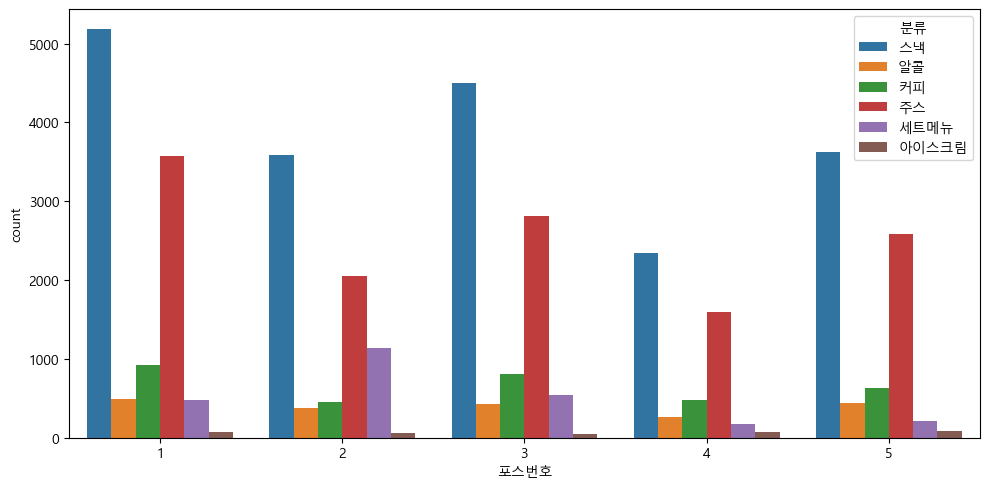

In [98]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df2, x = '포스번호', hue = '분류')

plt.tight_layout()
plt.show()

In [99]:
df2_pose = df2.pivot_table(index = '포스번호', values = ['수량', '매출'], aggfunc = 'sum').reset_index()
df2_pose = df2_pose.sort_values(by = '수량', ascending = False)
df2_pose['평균 판매가'] = round(df2_pose['매출'] / df2_pose['수량'], 1)
df2_pose

,포스번호,매출,수량,평균 판매가
0,1,62317356,13234,4708.9
2,3,54038316,11077,4878.4
4,5,42193503,9319,4527.7
1,2,53318125,9184,5805.5
3,4,27591374,5905,4672.5


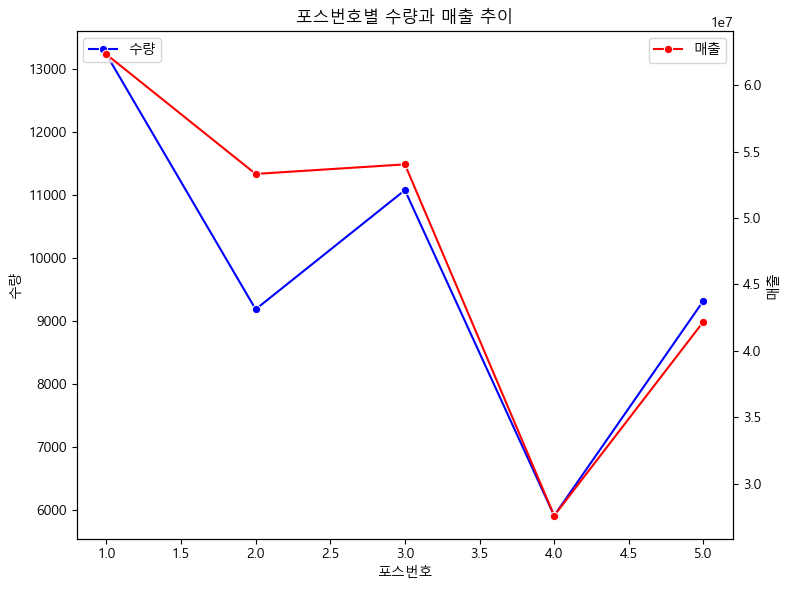

In [100]:
fig, ax1 = plt.subplots(figsize=(8, 6))
sns.lineplot(x='포스번호', y='수량', data=df2_pose, marker='o', color='b', label='수량', ax = ax1)
ax2 = ax1.twinx()
sns.lineplot(x='포스번호', y='매출', data=df2_pose, marker='o', color='r', label='매출', ax = ax2)

plt.title('포스번호별 수량과 매출 추이')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

2번 포스기의 경우 판매 수량에 비해 매출액이 높다.

In [101]:
cond = df2['포스번호'] == 2
df_pose_two = df2[cond].reset_index(drop = True)
df_pose_two

,메뉴,포스번호,영수번호,수량,매출,요일,날씨,년,월,일,분류,시간,총 매출,주
0,캬라멜팝콘(M),2,73,1,5000,금,비,2022,11,25,스낵,7PM,5500,평일
1,Couple set A,2,89,1,14545,수,눈,2022,12,21,세트메뉴,7PM,16000,평일
2,츄러스,2,178,1,4545,토,눈,2022,12,31,스낵,3PM,5000,주말
3,생수,2,56,1,909,토,맑음,2022,11,26,주스,12AM,1000,주말
4,캬라멜팝콘(M),2,16,1,5000,일,맑음,2022,11,20,스낵,1PM,5500,주말
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7656,아이스 아메리카노(Ice Coffee),2,28,1,4545,금,맑음,2022,11,18,커피,7PM,5000,평일
7657,뉴욕핫도그,2,19,1,6364,금,맑음,2022,11,18,스낵,7PM,7000,평일
7658,츄러스,2,64,1,4545,금,맑음,2022,11,11,스낵,7PM,5000,평일
7659,코카콜라,2,33,1,3182,금,맑음,2022,11,11,주스,7PM,3500,평일


In [102]:
df_pose_two['분류'].value_counts()

스낵       3581
주스       2054
세트메뉴     1140
커피        449
알콜        380
아이스크림      57
Name: 분류, dtype: int64

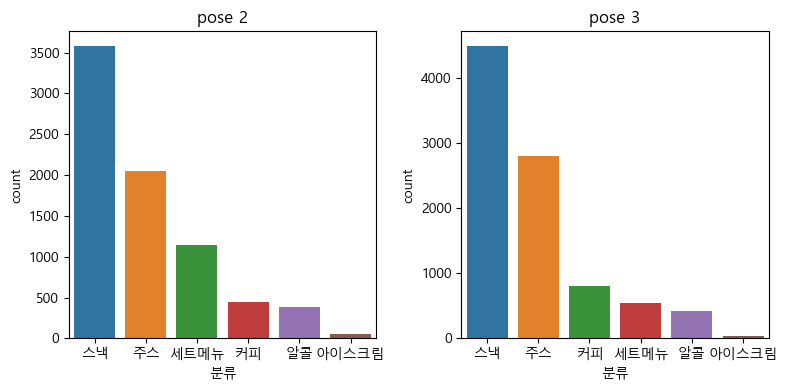

In [103]:
cond = df2['포스번호'] == 3
df_pose_three = df2[cond].reset_index(drop = True)

fig, axs = plt.subplots(1, 2, figsize = (8, 4))

for i in range(2):
    row, col = i // 2, i % 2
    if i == 0:
        sns.countplot(data = df_pose_two, x = '분류', order=df_pose_two['분류'].value_counts().index, ax = axs[col])
        axs[col].set_title('pose 2')
    else:
        sns.countplot(data = df_pose_three, x = '분류', order=df_pose_three['분류'].value_counts().index, ax = axs[col])
        axs[col].set_title('pose 3')

plt.tight_layout()
plt.show()

2번 포스기의 세트메뉴 판매수량이 많음을 알 수 있다.

## 탐색적 분석

요일 별 판매 매출 비교

In [130]:
df2_day = df2.pivot_table(index = '요일', values = ['총 매출', '수량'], aggfunc = 'sum').reset_index()
df2_day.sort_values(by = '총 매출', ascending = False, inplace = True)
df2_day['평균 판매가'] = round(df2_day['총 매출'] / df2_day['수량'], 1)
df2_day

,요일,수량,총 매출,평균 판매가
4,토,16050,129166415,8047.8
3,일,13314,101309423,7609.2
0,금,7739,63383949,8190.2
1,목,4934,43736473,8864.3
2,수,5052,42025979,8318.7
5,화,1630,12148485,7453.1


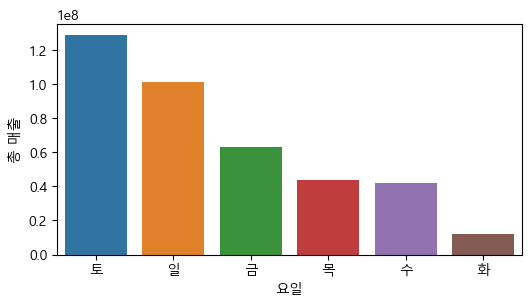

In [132]:
plt.figure(figsize = (6, 3))
sns.barplot(data = df2_day, x = '요일', y= '총 매출')
plt.show()

    주       총 매출
0  주말  230475838
1  평일  161294886


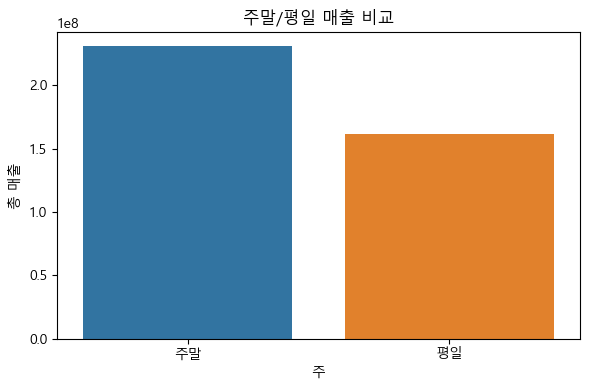

In [133]:
df2_week_sell = df2.pivot_table(index = '주', values = '총 매출', aggfunc = 'sum').reset_index()
print(df2_week_sell)
plt.figure(figsize = (6, 4))
sns.barplot(data = df2_week_sell, x = '주', y = '총 매출')
plt.title('주말/평일 매출 비교')
plt.tight_layout()
plt.show()

주말의 매출이 평일에 비해 1.5배 정도 높게 나타남을 알 수 있다.

In [135]:
cond = df2['주'] == '주말'
df2_weekend = df2[cond]
df2_weekday = df2[~cond]

df2_weekend_sell = df2_weekend.pivot_table(index = '분류', values = ['총 매출', '수량'], aggfunc = 'sum').reset_index()
df2_weekday_sell = df2_weekday.pivot_table(index = '분류', values =  ['총 매출', '수량'], aggfunc = 'sum').reset_index()

df2_weekend_sell.sort_values(by = '총 매출', ascending = False, inplace = True)
df2_weekday_sell.sort_values(by = '총 매출', ascending = False, inplace = True)

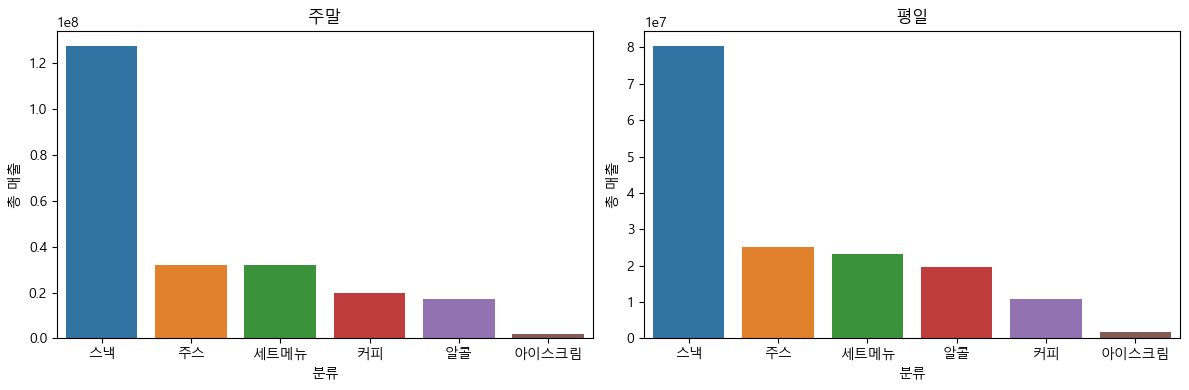

In [136]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))

for i in range(2):
    row, col = i // 2, i % 2
    if i == 0:
        sns.barplot(data = df2_weekend_sell, x = '분류', y= '총 매출', ax = axs[col])
        axs[col].set_title('주말')
    else:
        sns.barplot(data = df2_weekday_sell, x = '분류', y= '총 매출', ax = axs[col])
        axs[col].set_title('평일')
plt.tight_layout()
plt.show()

평일과 주말간에 매출차이는 극명하지만 제품판매 비율은 비슷한다. -> 단순히 판매량이 높은것

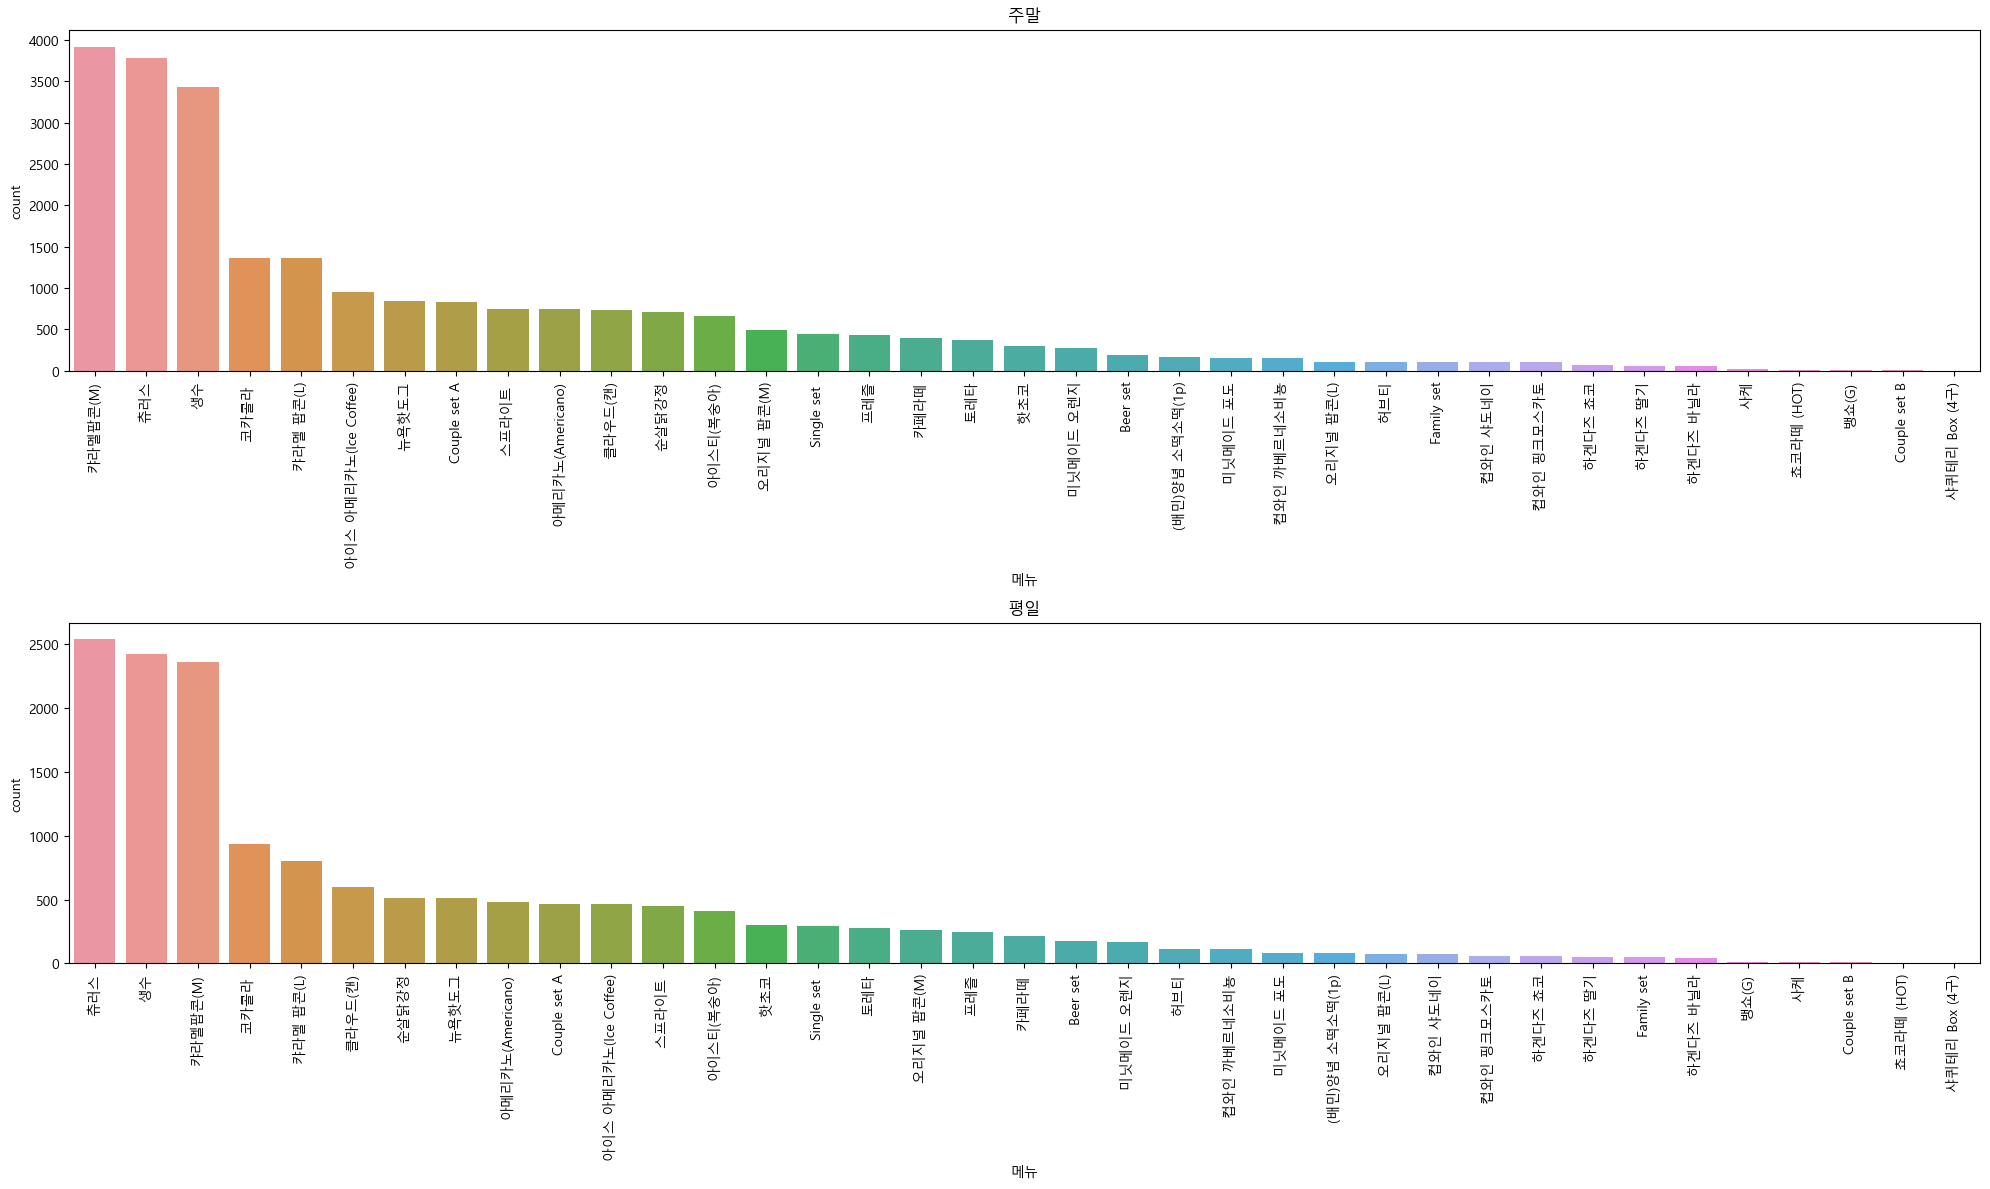

In [137]:
fig, axs = plt.subplots(2, 1, figsize = (20, 12))

for i in range(2):
    row, col = i // 1, i % 1
    if i == 0:
        sns.countplot(data = df2_weekend, x = '메뉴', order=df2_weekend['메뉴'].value_counts().index, ax = axs[row])
        axs[row].set_title('주말')
    else:
        sns.countplot(data = df2_weekday, x = '메뉴', order=df2_weekday['메뉴'].value_counts().index, ax = axs[row])
        axs[row].set_title('평일')
    axs[row].set_xticklabels(axs[row].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

실제 판매되는 물품역시 별다른 차이가 없음을 확인.

## 탐색적 분석

날씨별 판매 매출, 수량 비교

In [163]:
df2_weather = df2.pivot_table(index = '날씨', values = ['총 매출', '수량'], aggfunc = 'sum').reset_index()
df2_weather.sort_values(by = '총 매출', ascending = False, inplace = True)
df2_weather['평균 판매가'] = round(df2_weather['총 매출'] / df2_weather['수량'], 1)
df2_weather

,날씨,수량,총 매출,평균 판매가
1,맑음,34569,272165248,7873.1
0,눈,6684,56953481,8520.9
3,흐림,5125,44601007,8702.6
2,비,2341,18050988,7710.8


비가오는날 판매수량 대비 매출액이 다른 날씨와 비교해서 적음을 알 수 있다.

In [214]:
cond = df2['날씨'] == '맑음'
cond1 = df2['날씨'] == '눈'
cond2 = df2['날씨'] == '흐림'
cond3 = df2['날씨'] == '비'

df2_weather_clear = df2[cond].pivot_table(index = '분류', values = ['총 매출', '수량'], aggfunc = 'sum').reset_index()
df2_weather_snow = df2[cond1].pivot_table(index = '분류', values = ['총 매출', '수량'], aggfunc = 'sum').reset_index()
df2_weather_cloud = df2[cond2].pivot_table(index = '분류', values = ['총 매출', '수량'], aggfunc = 'sum').reset_index()
df2_weather_rainy = df2[cond3].pivot_table(index = '분류', values = ['총 매출', '수량'], aggfunc = 'sum').reset_index()

df2_weather_clear['비율'] = round((df2_weather_clear['수량'] / df2_weather_clear['수량'].sum() * 100), 2)
df2_weather_snow['비율'] = round((df2_weather_snow['수량'] / df2_weather_snow['수량'].sum() * 100), 2)
df2_weather_cloud['비율'] = round((df2_weather_cloud['수량'] / df2_weather_cloud['수량'].sum() * 100), 2)
df2_weather_rainy['비율'] = round((df2_weather_rainy['수량'] / df2_weather_rainy['수량'].sum() * 100), 2)

df2_weather_clear['매출 비율'] = round((df2_weather_clear['총 매출'] / df2_weather_clear['총 매출'].sum() * 100), 2)
df2_weather_snow['매출 비율'] = round((df2_weather_snow['총 매출'] / df2_weather_snow['총 매출'].sum() * 100), 2)
df2_weather_cloud['매출 비율'] = round((df2_weather_cloud['총 매출'] / df2_weather_cloud['총 매출'].sum() * 100), 2)
df2_weather_rainy['매출 비율'] = round((df2_weather_rainy['총 매출'] / df2_weather_rainy['총 매출'].sum() * 100), 2)
df2_weather_clear

,분류,수량,총 매출,비율,매출 비율
0,세트메뉴,1998,38816004,5.78,14.26
1,스낵,16578,144638779,47.96,53.14
2,아이스크림,271,2736989,0.78,1.01
3,알콜,1979,25578510,5.72,9.40
4,주스,10955,40044456,31.69,14.71
5,커피,2788,20350510,8.07,7.48


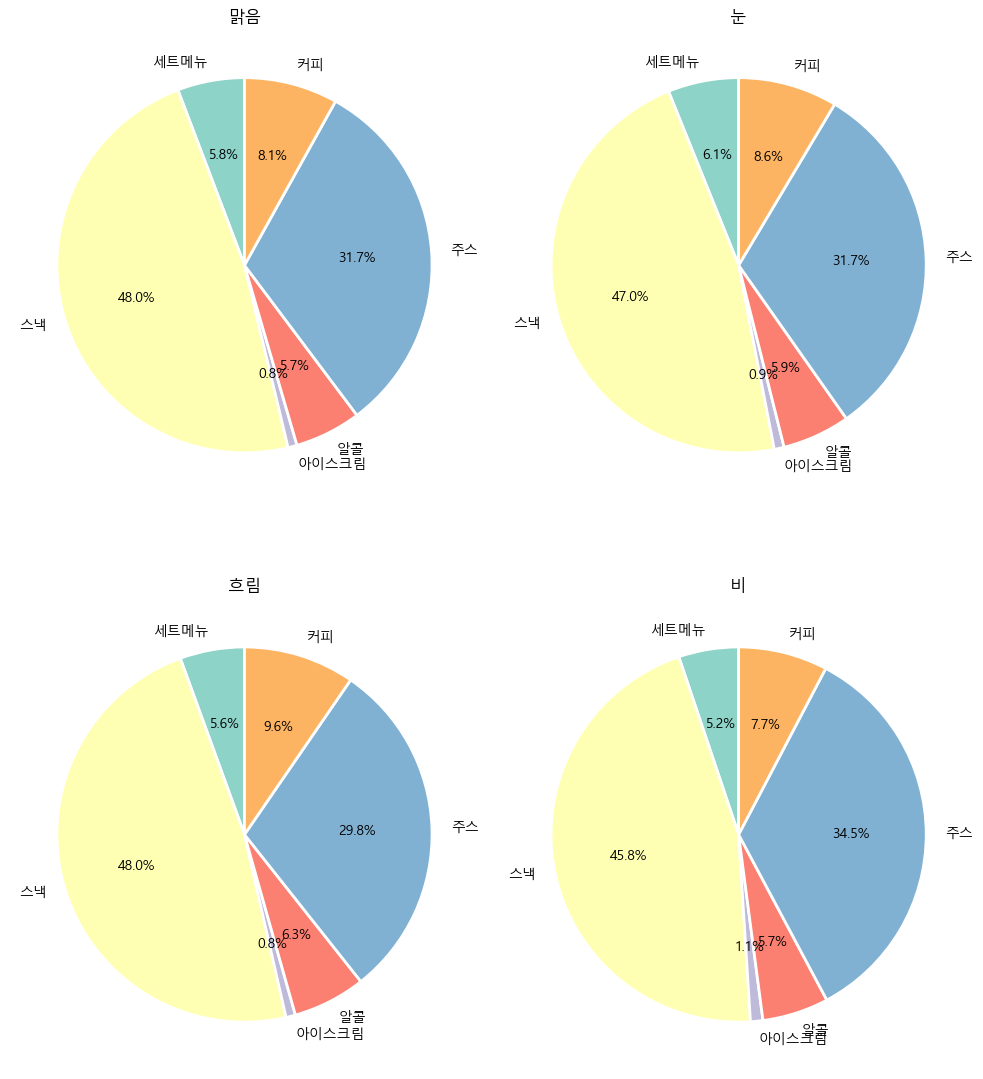

In [212]:
fig, axs = plt.subplots(2, 2, figsize = (10, 12))

dataframe = [df2_weather_clear, df2_weather_snow, df2_weather_cloud, df2_weather_rainy]
for i , column in enumerate(dataframe):
    row, col = i // 2, i % 2
    axs[row, col].pie(column['비율'], labels=column.set_index('분류').index, 
            autopct='%.1f%%', 
            startangle=90,
            colors=plt.cm.Set3.colors, 
            wedgeprops=dict(edgecolor='w', linewidth=2))
    if i == 0:
        axs[row, col].set_title('맑음')
    elif i == 1:
        axs[row, col].set_title('눈')
    elif i == 2:
        axs[row, col].set_title('흐림')
    else:
        axs[row, col].set_title('비')
plt.tight_layout()
plt.show()

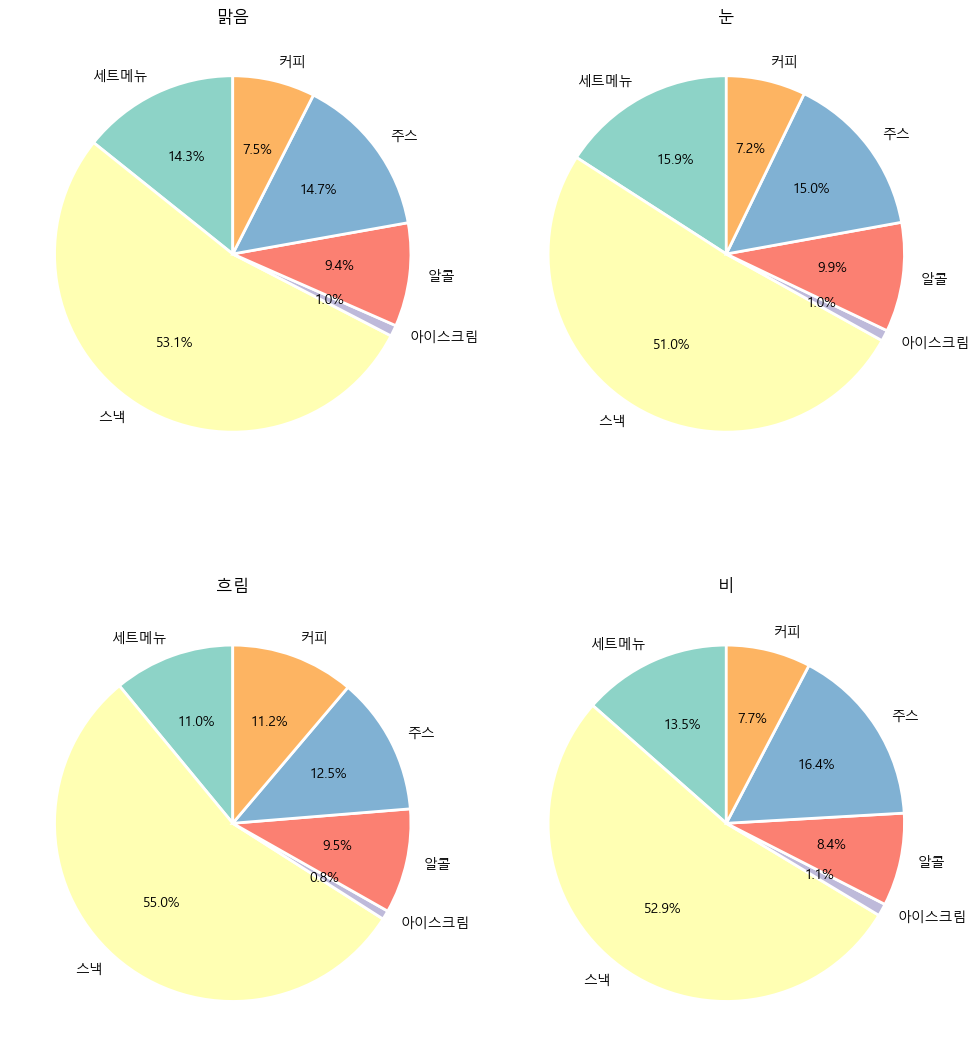

In [215]:
fig, axs = plt.subplots(2, 2, figsize = (10, 12))

dataframe = [df2_weather_clear, df2_weather_snow, df2_weather_cloud, df2_weather_rainy]
for i , column in enumerate(dataframe):
    row, col = i // 2, i % 2
    axs[row, col].pie(column['매출 비율'], labels=column.set_index('분류').index, 
            autopct='%.1f%%', 
            startangle=90,
            colors=plt.cm.Set3.colors, 
            wedgeprops=dict(edgecolor='w', linewidth=2))
    if i == 0:
        axs[row, col].set_title('맑음')
    elif i == 1:
        axs[row, col].set_title('눈')
    elif i == 2:
        axs[row, col].set_title('흐림')
    else:
        axs[row, col].set_title('비')
plt.tight_layout()
plt.show()

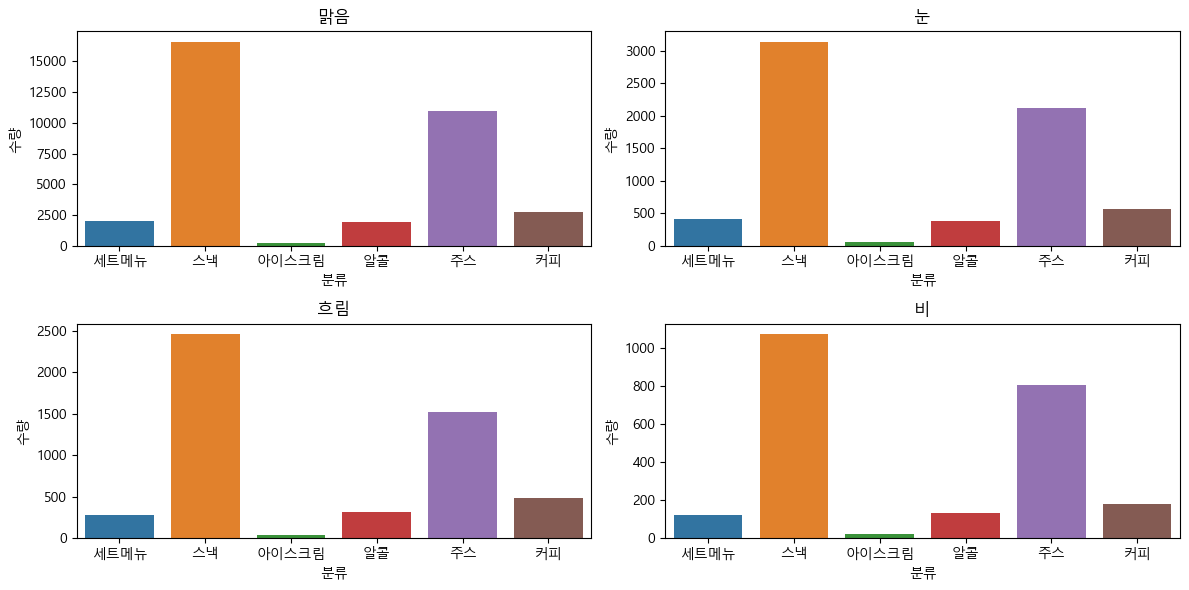

In [142]:
fig, axs = plt.subplots(2, 2, figsize = (12, 6))

for i in range(4):
    row, col = i // 2, i % 2
    if i == 0:
        sns.barplot(data = df2_weather_clear, x = '분류', y = '수량', ax = axs[row, col])
        axs[row, col].set_title('맑음')
    if i == 1:
        sns.barplot(data = df2_weather_snow, x = '분류', y = '수량', ax = axs[row, col])
        axs[row, col].set_title('눈')
    if i == 2:
        sns.barplot(data = df2_weather_cloud, x = '분류', y= '수량', ax = axs[row, col])
        axs[row, col].set_title('흐림')
    if i == 3:
        sns.barplot(data = df2_weather_rainy, x = '분류', y= '수량', ax = axs[row, col])
        axs[row, col].set_title('비')
        
plt.tight_layout()
plt.show()

비가 오는날 주스 판매수량 비율이 다른 날씨 대비 높다.

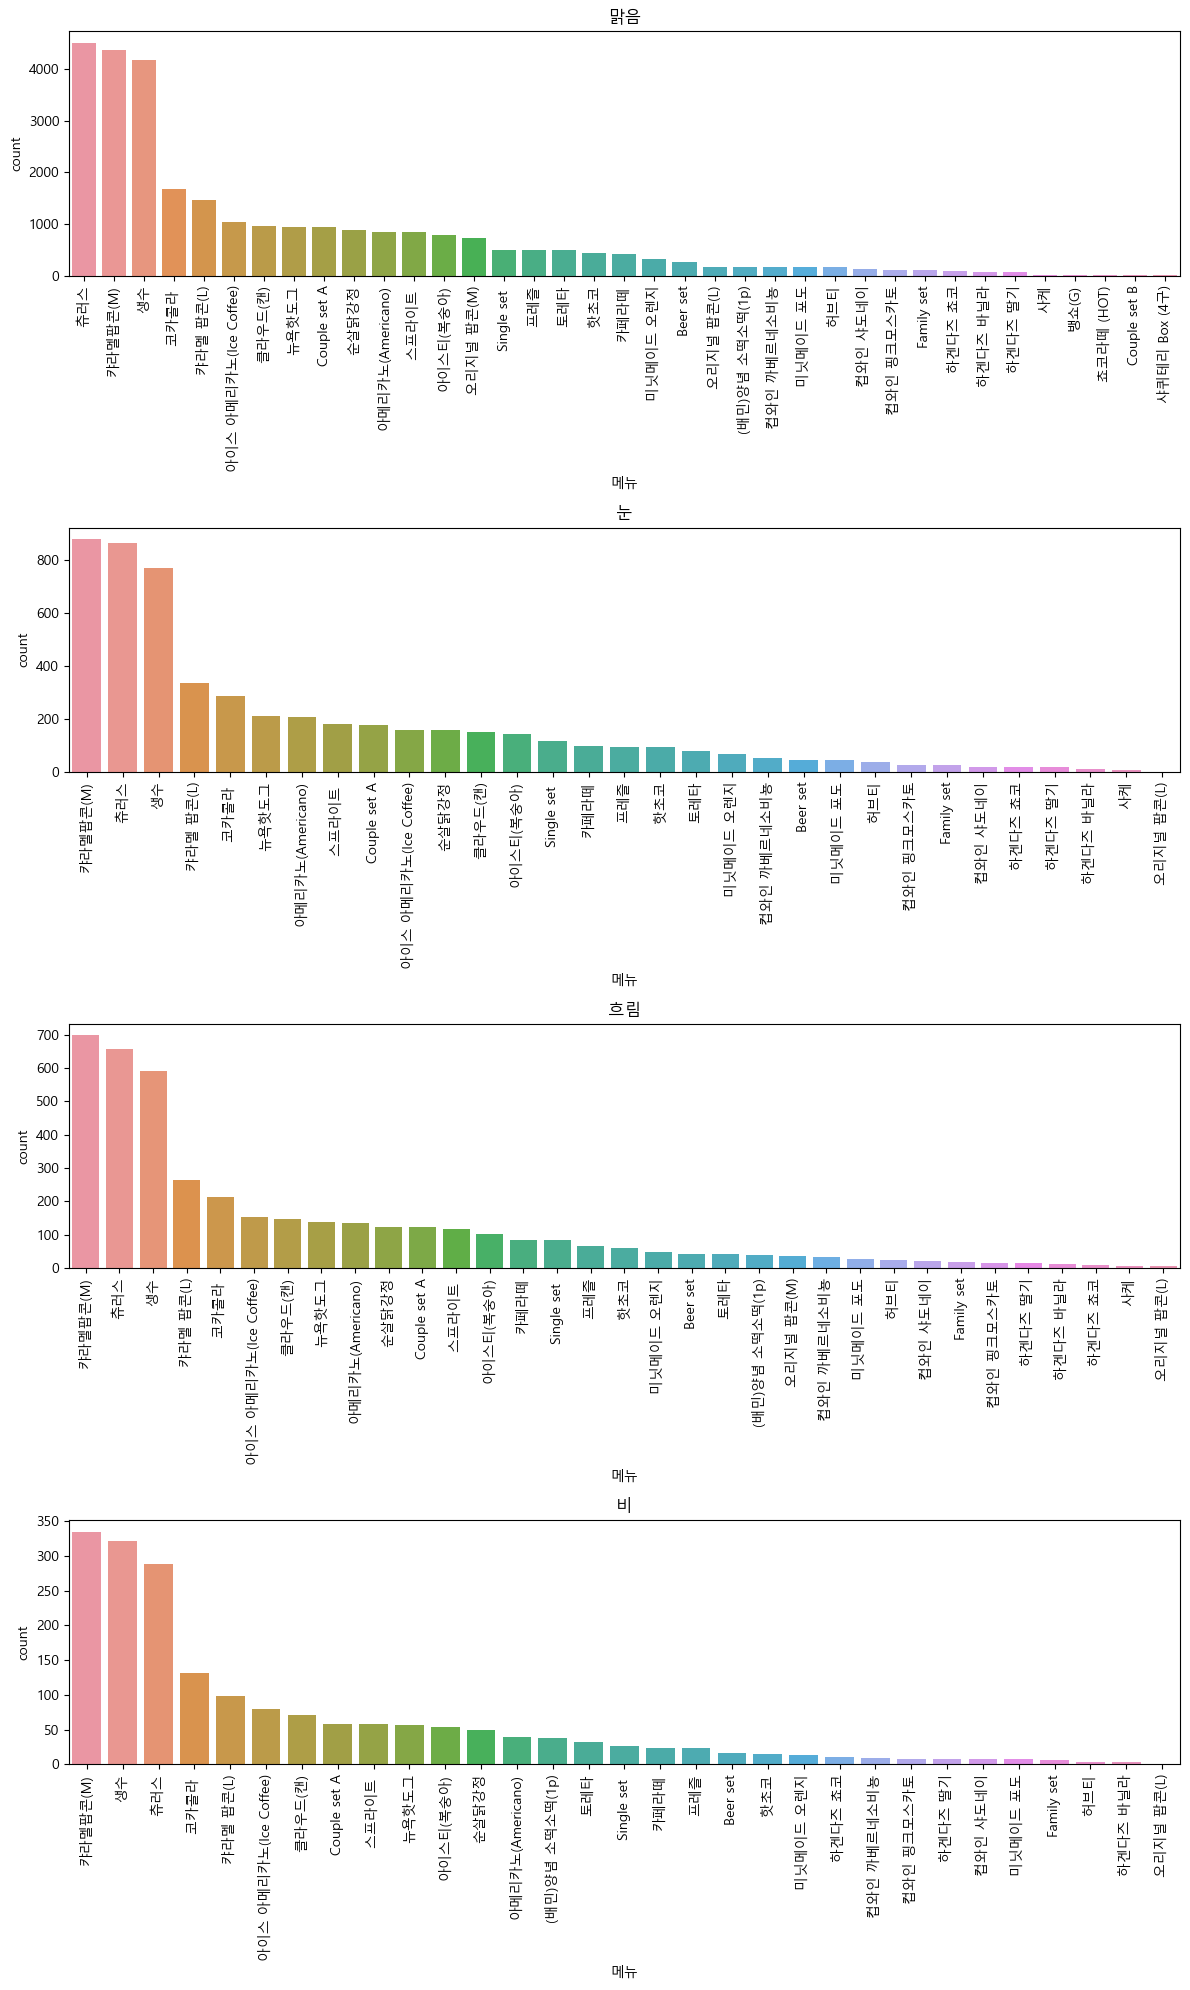

In [203]:
fig, axs = plt.subplots(4, 1, figsize = (12, 20))

for i in range(4):
    row, col = i // 1, i % 1
    if i == 0:
        sns.countplot(data =  df2[cond], x = '메뉴', order= df2[cond]['메뉴'].value_counts().index, ax = axs[row])
        axs[row].set_title('맑음')
    elif i == 1:
        sns.countplot(data =  df2[cond1], x = '메뉴', order= df2[cond1]['메뉴'].value_counts().index, ax = axs[row])
        axs[row].set_title('눈')
    elif i == 2:
        sns.countplot(data =  df2[cond2], x = '메뉴', order= df2[cond2]['메뉴'].value_counts().index, ax = axs[row])
        axs[row].set_title('흐림')
    else:
        sns.countplot(data =  df2[cond3], x = '메뉴', order= df2[cond3]['메뉴'].value_counts().index, ax = axs[row])
        axs[row].set_title('비')
    axs[row].set_xticklabels(axs[row].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

비가오는날 생수판매 수량이 증가함을 알 수 있다.

## 탐색적 분석

월별 판매 매출, 수량 비교

In [114]:
df2_ymd = df2[['메뉴', '수량', '매출', '총 매출', '날씨', '월', '분류']]
df2_ymd.head(2)

,메뉴,수량,매출,총 매출,날씨,월,분류
0,캬라멜팝콘(M),1,5000,5500,비,11,스낵
1,컵와인 까베르네소비뇽,2,18182,40000,맑음,10,알콜


In [115]:
df2_ymd_total = df2_ymd.groupby(['월', '분류'])['총 매출'].sum().reset_index()
df2_ymd_cnt = df2_ymd.groupby(['월', '분류'])['수량'].sum().reset_index()

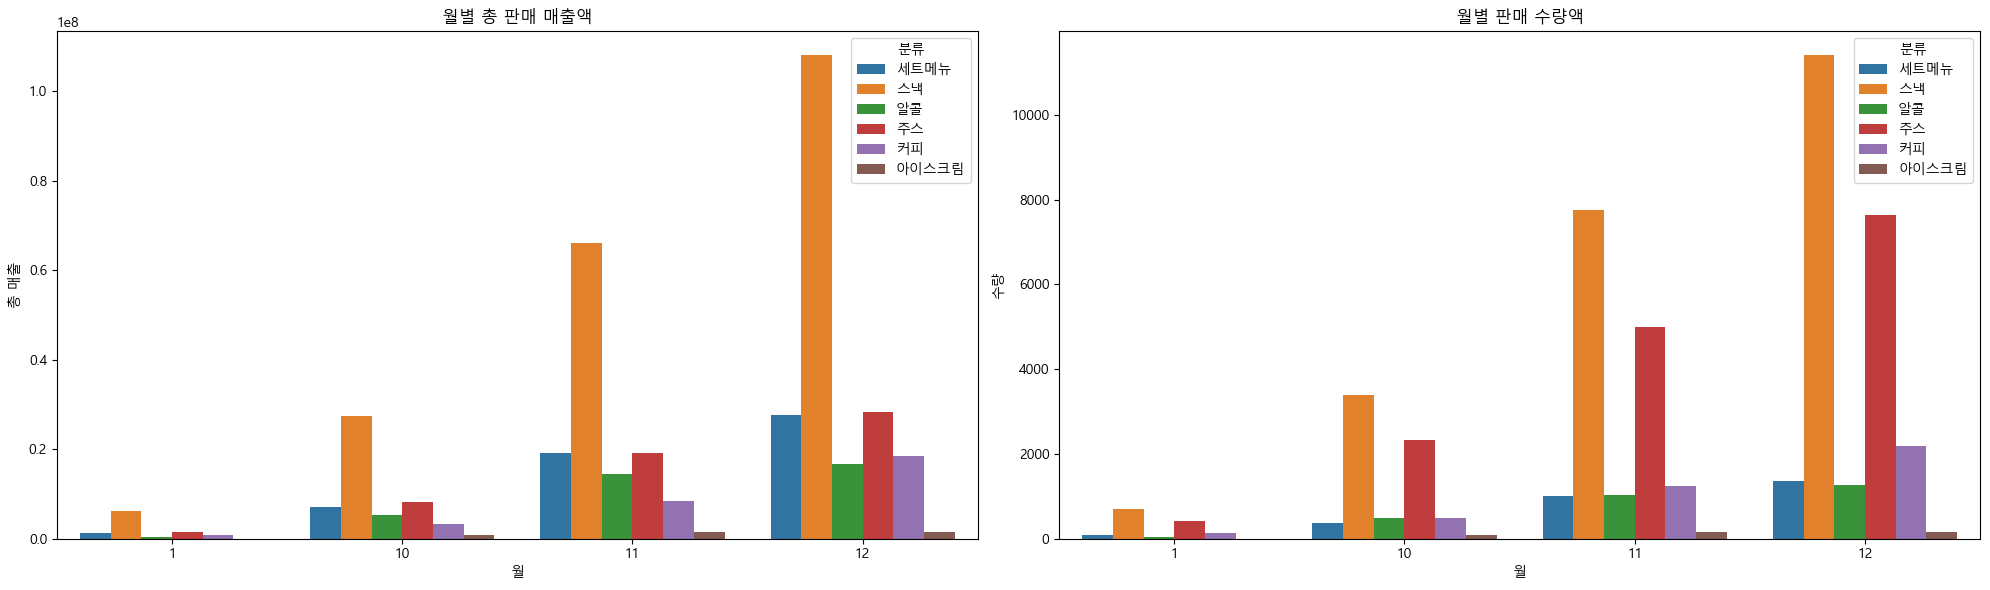

In [116]:
fig, axs = plt.subplots(1, 2, figsize = (20, 6))

for i in range(4):
    row, col = i // 2, i % 2
    if i == 0:
        sns.barplot(data = df2_ymd_total, x = '월' , y = '총 매출', hue = '분류', ax = axs[col])
        axs[col].set_title('월별 총 판매 매출액')
    elif i == 1:
        sns.barplot(data = df2_ymd_cnt, x = '월' , y = '수량', hue = '분류', ax = axs[col])
        axs[col].set_title('월별 판매 수량액')
plt.tight_layout()
plt.show()

12월의 경우 알콜, 주스대비 커피 주문량이 높음을 알 수 있다.

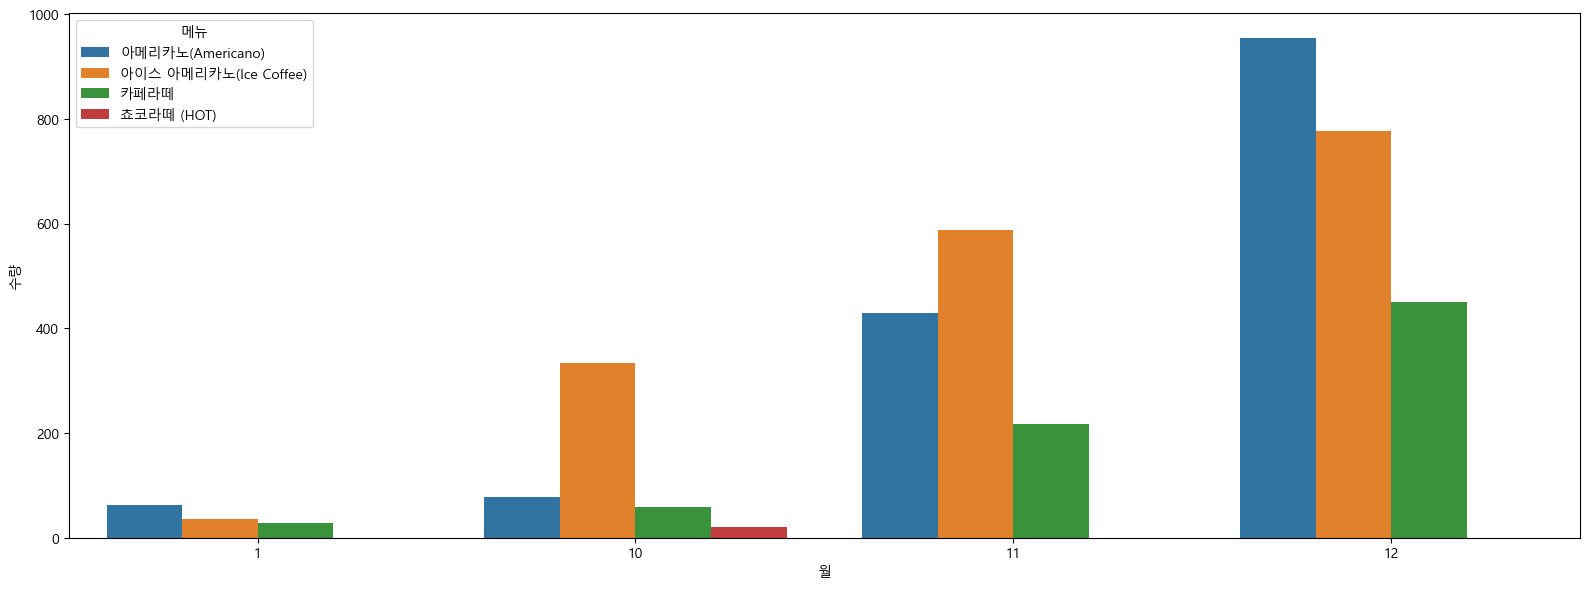

In [218]:
cond = df2_ymd['분류'] == '커피'
df2_coffee = df2_ymd[cond]
df2_coffee_cnt = df2_coffee.groupby(['월', '메뉴'])['수량'].sum().reset_index()

plt.figure(figsize = (16, 6))
sns.barplot(data = df2_coffee_cnt, x = '월' , y = '수량', hue = '메뉴')
plt.tight_layout()
plt.show()

12월 아메리카노 판매수량이 급증함을 알 수 있다

## 탐색적 분석

시간대별 판매 매출, 수량 비교

In [118]:
df2_time = df2[['메뉴', '분류', '수량', '매출', '총 매출', '날씨', '시간']]
df2_time.head(2)

,메뉴,분류,수량,매출,총 매출,날씨,시간
0,캬라멜팝콘(M),스낵,1,5000,5500,비,7PM
1,컵와인 까베르네소비뇽,알콜,2,18182,40000,맑음,7PM


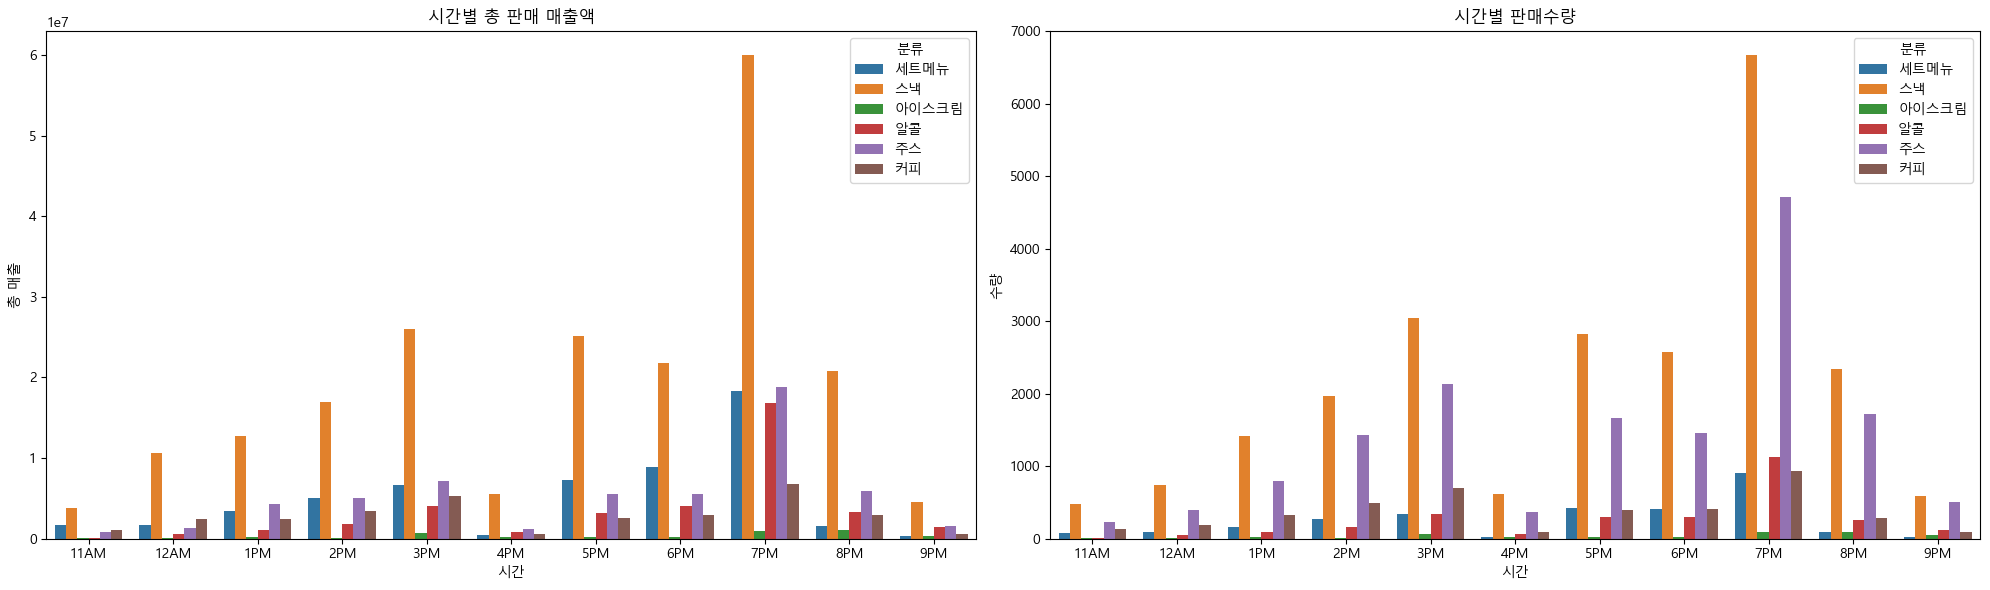

In [119]:
df2_time_cnt = df2_time.groupby(['시간', '분류'])['수량'].sum().reset_index()
df2_time_total = df2_time.groupby(['시간', '분류'])['총 매출'].sum().reset_index()

fig, axs = plt.subplots(1, 2, figsize = (20, 6))
for i in range(3):
    row, col = i // 2, i % 2
    if i == 0:
        sns.barplot(data = df2_time_total, x = '시간' , y = '총 매출', hue = '분류', ax = axs[col])
        axs[col].set_title('시간별 총 판매 매출액')
    elif i == 1:
        sns.barplot(data = df2_time_cnt, x = '시간' , y = '수량', hue = '분류', ax = axs[col])
        axs[col].set_title('시간별 판매수량')

plt.tight_layout()
plt.show()

10AM의 주스의 총 매출액이 가장 높은 이유는 그 외 제품들은 판매되지 않았기 때문.  
7PM 저녁시간대에 가장 많은 매출액이 나타남, 알콜 주문량이 3번째

## 탐색적 분석

영수번호별 판매 메뉴 분류

In [23]:
df2.head(2)

,메뉴,포스번호,영수번호,수량,매출,요일,날씨,년,월,일,분류,시간,총 매출,주
0,캬라멜팝콘(M),2,73,1,5000,금,비,2022,11,25,스낵,7PM,5500,평일
1,컵와인 까베르네소비뇽,1,293,2,18182,일,맑음,2022,10,30,알콜,7PM,40000,주말


In [24]:
df2_rec = df2.copy()
df2_rec['날짜'] = df2['년'].astype(str) + df2['월'].astype(str) + df2['일'].astype(str)
df2_rec.head()

,메뉴,포스번호,영수번호,수량,매출,요일,날씨,년,월,일,분류,시간,총 매출,주,날짜
0,캬라멜팝콘(M),2,73,1,5000,금,비,2022,11,25,스낵,7PM,5500,평일,20221125
1,컵와인 까베르네소비뇽,1,293,2,18182,일,맑음,2022,10,30,알콜,7PM,40000,주말,20221030
2,아이스 아메리카노(Ice Coffee),1,43,1,4545,수,흐림,2022,11,9,커피,7PM,5000,평일,2022119
3,캬라멜팝콘(M),1,20,1,5000,수,맑음,2022,10,19,스낵,7PM,5500,평일,20221019
4,츄러스,1,109,1,4545,토,비,2022,11,12,스낵,1PM,5000,주말,20221112


In [79]:
df2_rec['메뉴 개수'] = df2_rec.groupby(['포스번호', '영수번호', '날짜'])['메뉴'].transform('nunique')
cond = df2_rec['메뉴 개수'] >= 2
df2_rec_over = df2_rec[cond]
df2_rec_over = df2_rec_over[['메뉴', '포스번호', '영수번호', '날짜', '메뉴 개수']]
df2_rec_over.head()

,메뉴,포스번호,영수번호,날짜,메뉴 개수
0,캬라멜팝콘(M),2,73,20221125,2
3,캬라멜팝콘(M),1,20,20221019,3
4,츄러스,1,109,20221112,3
13,Couple set A,2,89,20221221,4
14,생수,1,47,20221230,3


In [70]:
from itertools import *
from collections import Counter

def comb(df2_rec_x, x):
    combinations_list = []
    for group, group_df in df2_rec_x.groupby(['포스번호', '영수번호', '날짜']):
        menu_combinations = list(combinations(sorted(group_df['메뉴']), x))
        combinations_list.extend(menu_combinations)

    combinations_counter = Counter(combinations_list)
    top_combinations = combinations_counter.most_common(10)
    result_df = pd.DataFrame(top_combinations, columns=['메뉴 조합', '카운트'])
    return result_df

In [80]:
comb(df2_rec_over, 2)

,메뉴 조합,카운트
0,"(생수, 캬라멜팝콘(M))",600
1,"(츄러스, 캬라멜팝콘(M))",545
2,"(생수, 츄러스)",505
3,"(캬라멜팝콘(M), 코카콜라 )",346
4,"(츄러스, 코카콜라 )",247
5,"(생수, 캬라멜 팝콘(L))",193
6,"(스프라이트 , 캬라멜팝콘(M))",165
7,"(아이스 아메리카노(Ice Coffee), 캬라멜팝콘(M))",160
8,"(캬라멜팝콘(M), 클라우드(캔))",158
9,"(생수, 코카콜라 )",158


In [81]:
comb(df2_rec_over, 3)

,메뉴 조합,카운트
0,"(생수, 츄러스, 캬라멜팝콘(M))",55
1,"(츄러스, 캬라멜팝콘(M), 코카콜라 )",41
2,"(생수, 캬라멜팝콘(M), 코카콜라 )",27
3,"(스프라이트 , 츄러스, 캬라멜팝콘(M))",19
4,"(아이스티(복숭아), 츄러스, 캬라멜팝콘(M))",19
5,"(아이스 아메리카노(Ice Coffee), 츄러스, 캬라멜팝콘(M))",19
6,"(생수, 아이스티(복숭아), 캬라멜팝콘(M))",16
7,"(아메리카노(Americano), 츄러스, 캬라멜팝콘(M))",16
8,"(순살닭강정, 츄러스, 코카콜라 )",15
9,"(뉴욕핫도그, 생수, 츄러스)",14


In [303]:
cond = df2['메뉴'] == '생수'
cond1 = df2['메뉴'] == '코카콜라 '

print(len(df2[cond]), len(df2[cond1]))

5852 2306


+++++++++

In [82]:
df2_menu = df2.pivot_table(index = '메뉴', values = '매출', aggfunc = 'sum').reset_index()
df2_menu.sort_values(by = '매출', ascending = False).head(10)

,메뉴,매출
21,츄러스,38216071
24,캬라멜팝콘(M),37210000
23,캬라멜 팝콘(L),21245667
2,Couple set A,20159443
6,뉴욕핫도그,10805806
29,클라우드(캔),10095000
13,순살닭강정,9469386
28,코카콜라,8330428
5,Single set,7900079
16,아이스 아메리카노(Ice Coffee),7881296


매출이 가장 높은 6개 제품

In [83]:
top_list = df2_menu.sort_values(by = '매출', ascending = False).head(6)['메뉴'].tolist()
top_list

['츄러스', '캬라멜팝콘(M)', '캬라멜 팝콘(L)', 'Couple set A', '뉴욕핫도그', '클라우드(캔)']